# **Automatidata project**
**Course 6 - The Nuts and bolts of machine learning**

You are a data professional in a data analytics firm called Automatidata. Their client, the New York City Taxi & Limousine Commission (New York City TLC), was impressed with the work you have done and has requested that you build a machine learning model to predict if a customer will not leave a tip. They want to use the model in an app that will alert taxi drivers to customers who are unlikely to tip, since drivers depend on tips.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 6 End-of-course project: Build a machine learning model

In this activity, you will practice using tree-based modeling techniques to predict on a binary target class.  
<br/>   

**The purpose** of this model is to find ways to generate more revenue for taxi cab drivers.  
  
**The goal** of this model is to predict whether or not a customer is a generous tipper.  
<br/>  

*This activity has three parts:*

**Part 1:** Ethical considerations 
* Consider the ethical implications of the request 

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, complete an Executive Summary using the questions listed on the PACE Strategy Document. 

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work. 



# Build a machine learning model

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

## PACE: Plan 

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:

1.   What are you being asked to do?\
Ans. To predict if a customer will give a tip or not.

2.   What are the ethical implications of the model? What are the consequences of your model making errors?
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a customer will give a tip, but they actually won't)?\
Ans. It will raise the expetations of the driver but lead to more dissapointment and frustation at the end of the ride for them.

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a customer will not give a tip, but they actually will)?\
Ans. It might lead to the driver being rude to the custome and that actually might prevent them from giving a tip.
  
3.   Do the benefits of such a model outweigh the potential problems?\
Ans. It would not cause benifit if it has a low f1 score. Instead it could cause loss of tips.

4.   Would you proceed with the request to build this model? Why or why not?\
Ans. Since it m=would lead to losses, it's better to change the objective.

5.   Can the objective be modified to make it less problematic?\
Ans. Yes it can be modified to either predict the tip amount itself or if the tip would be above a certain threshold or not?

Suppose you were to modify the modeling objective so, instead of predicting people who won't tip at all, you predicted people who are particularly generous&mdash;those who will tip 20% or more? Consider the following questions:

1.  What features do you need to make this prediction?

2.  What would be the target variable?  

3.  What metric should you use to evaluate your model? Do you have enough information to decide this now?


Ans 
1. Passenger count, total amount and ideally behaviour of driver (either rude or polite)
2. Tip Amount and Tip Type
3. Recall, Precision and F1 Score.

### **Task 1. Imports and data loading**

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime as dt
import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
pd.set_option('display.max_columns', None)

In [26]:
# Load dataset into dataframe 
df = pd.read_csv("../Automatidata Feature Eng..csv")
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour,Predicted_Fare
0,1,2017-01-10 01:40:22,2017-01-10 01:44:41,1,0.40,1,N,186,170,1,4.5,0.0,0.5,1.05,0.0,0.3,6.35,4.316667,186 170,1.037439,9.777033,Tuesday,January,0,7.514209
1,1,2017-01-09 08:54:14,2017-01-09 08:59:45,1,1.10,1,N,43,239,1,6.0,0.5,0.5,1.80,0.0,0.3,9.10,5.516667,43 239,1.401429,7.226190,Monday,January,1,7.694305
2,2,2017-01-07 07:56:59,2017-01-07 08:15:04,6,2.20,1,N,237,100,2,12.5,0.0,0.5,0.00,0.0,0.3,13.30,18.083333,237 100,2.124839,20.666129,Saturday,January,0,12.160771
3,1,2017-01-15 12:23:24,2017-01-15 12:34:15,1,1.20,1,N,211,45,2,8.5,0.0,0.5,0.00,0.0,0.3,9.30,10.850000,211 45,1.006000,9.606667,Sunday,January,0,7.411933
4,2,2017-01-20 01:53:32,2017-01-20 02:09:57,2,4.84,1,N,148,181,1,17.0,0.5,0.5,2.00,0.0,0.3,20.30,16.416667,148 181,4.450000,20.027778,Friday,January,0,16.786437


### **Task 2. Feature engineering**

We have already prepared much of this data and performed exploratory data analysis (EDA) in previous courses. 

In [11]:
print(df.shape)

# Keep `df0` as the original dataframe and create a copy (df) where changes will go
# Can revert `df` to `df0` if needed down the line
df0 = df.copy()

# Display basic info about the dataset

df = df.convert_dtypes()
df.info()

(49998, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               49998 non-null  Int64  
 1   tpep_pickup_datetime   49998 non-null  string 
 2   tpep_dropoff_datetime  49998 non-null  string 
 3   passenger_count        49998 non-null  Int64  
 4   trip_distance          49998 non-null  Float64
 5   RatecodeID             49998 non-null  Int64  
 6   store_and_fwd_flag     49998 non-null  string 
 7   PULocationID           49998 non-null  Int64  
 8   DOLocationID           49998 non-null  Int64  
 9   payment_type           49998 non-null  Int64  
 10  fare_amount            49998 non-null  Float64
 11  extra                  49998 non-null  Float64
 12  mta_tax                49998 non-null  Float64
 13  tip_amount             49998 non-null  Float64
 14  tolls_amount           49998 non-null  Flo

## PACE: **Analyze**

Consider the questions in your PACE Strategy Documentto reflect on the Analyze stage.

In [12]:
df.groupby('payment_type').mean()['tip_amount']

payment_type
1    2.582066
2         0.0
3         0.0
4         0.0
Name: tip_amount, dtype: Float64

We know from EDA that dataset only has tip amounts for customers who pay by credit card. Thus to meet the modeling objective, we'll need to sample the data to select only the customers who pay with credit card. 

In [27]:
# Subset the data to isolate only customers who paid by credit card
df = df[df.payment_type == 1].reset_index(drop=True)

##### **Target**

Notice that there isn't a column that indicates tip percent, which is what you need to create the target variable. You'll have to engineer it. 

Add a `tip_percent` column to the dataframe by performing the following calculation:  
<br/>  


$$tip\ percent = \frac{tip\ amount}{total\ amount - tip\ amount}$$  


In [28]:
# Create tip % col
df['tip_percent'] = df.tip_amount / (df.total_amount-df.tip_amount)

Now create another column called `generous`. This will be the target variable. The column should be a binary indicator of whether or not a customer tipped ≥ 20% (0=no, 1=yes).

In [29]:
# Create 'generous' col (target)
df['generous'] = (df.tip_percent >= 0.2)

#### Create day column

Next, you're going to be working with the pickup and dropoff columns.

Convert the `tpep_pickup_datetime` and `tpep_dropoff_datetime` columns to datetime.

In [30]:
# Convert `tpep_pickup_datetime` to datetime format
df.tpep_pickup_datetime = pd.to_datetime(df.tpep_pickup_datetime, infer_datetime_format=True)

# Convert `tpep_dropoff_datetime` to datetime format
df.tpep_dropoff_datetime = pd.to_datetime(df.tpep_dropoff_datetime, infer_datetime_format=True)

Next, engineer four new columns that represent time of day bins. Each column should contain binary values (0=no, 1=yes) that indicate whether a trip began (picked up) during the following times:

`am_rush` = [06:00&ndash;10:00)  
`daytime` = [10:00&ndash;16:00)  
`pm_rush` = [16:00&ndash;20:00)  
`nighttime` = [20:00&ndash;06:00)  

To do this, first create the four columns. For now, each new column should be identical and contain the same information: the hour (only) from the `tpep_pickup_datetime` column.

In [31]:
# Create 'am_rush' col
df['am_rush'] = [6 <= row.hour < 10 for row in df.tpep_pickup_datetime]

# Create 'daytime' col
df['daytime'] = [10 <= row.hour < 16 for row in df.tpep_pickup_datetime]

# Create 'pm_rush' col
df['pm_rush'] = [16 <= row.hour < 20 for row in df.tpep_pickup_datetime]

# Create 'nighttime' col
df['nighttime'] = [(20 <= row.hour < 24) | (row.hour < 6) for row in df.tpep_pickup_datetime]

# Display the dataset
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour,Predicted_Fare,tip_percent,generous,am_rush,daytime,pm_rush,nighttime
0,1,2017-01-10 01:40:22,2017-01-10 01:44:41,1,0.40,1,N,186,170,1,4.5,0.0,0.5,1.05,0.0,0.3,6.35,4.316667,186 170,1.037439,9.777033,Tuesday,January,0,7.514209,0.198113,False,False,False,False,True
1,1,2017-01-09 08:54:14,2017-01-09 08:59:45,1,1.10,1,N,43,239,1,6.0,0.5,0.5,1.80,0.0,0.3,9.10,5.516667,43 239,1.401429,7.226190,Monday,January,1,7.694305,0.246575,True,True,False,False,False
2,2,2017-01-20 01:53:32,2017-01-20 02:09:57,2,4.84,1,N,148,181,1,17.0,0.5,0.5,2.00,0.0,0.3,20.30,16.416667,148 181,4.450000,20.027778,Friday,January,0,16.786437,0.109290,False,False,False,False,True
3,2,2017-01-10 09:16:31,2017-01-10 09:24:18,1,0.85,1,N,170,161,1,6.5,0.0,0.5,1.46,0.0,0.3,8.76,7.783333,170 161,0.968000,7.988542,Tuesday,January,1,6.974849,0.200000,True,True,False,False,False
4,2,2017-01-05 06:30:17,2017-01-05 06:42:34,1,1.46,1,N,237,237,1,9.0,1.0,0.5,2.16,0.0,0.3,12.96,12.283333,237 237,0.737745,5.736520,Thursday,January,1,6.002873,0.200000,True,True,False,False,False


In [32]:
# Alter the 'day' col
df.day = df.day.str.slice(stop=3).str.lower()

In [33]:
# Alter the 'month' column
df.month = df.month.str.slice(stop=3).str.lower()

In [20]:
# Another way
df.tpep_pickup_datetime.dt.strftime("%b").str.lower()

0        jan
1        jan
4        jan
5        jan
6        jan
        ... 
49992    jan
49993    jan
49994    jan
49995    jan
49997    jan
Name: tpep_pickup_datetime, Length: 32993, dtype: object

#### Drop columns

Drop redundant and irrelevant columns as well as those that would not be available when the model is deployed. This includes information like payment type, trip distance, tip amount, tip percentage, total amount, toll amount, etc. The target variable (`generous`) must remain in the data because it will get isolated as the `y` data for modeling.

In [34]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour,Predicted_Fare,tip_percent,generous,am_rush,daytime,pm_rush,nighttime
0,1,2017-01-10 01:40:22,2017-01-10 01:44:41,1,0.40,1,N,186,170,1,4.5,0.0,0.5,1.05,0.0,0.3,6.35,4.316667,186 170,1.037439,9.777033,tue,jan,0,7.514209,0.198113,False,False,False,False,True
1,1,2017-01-09 08:54:14,2017-01-09 08:59:45,1,1.10,1,N,43,239,1,6.0,0.5,0.5,1.80,0.0,0.3,9.10,5.516667,43 239,1.401429,7.226190,mon,jan,1,7.694305,0.246575,True,True,False,False,False
2,2,2017-01-20 01:53:32,2017-01-20 02:09:57,2,4.84,1,N,148,181,1,17.0,0.5,0.5,2.00,0.0,0.3,20.30,16.416667,148 181,4.450000,20.027778,fri,jan,0,16.786437,0.109290,False,False,False,False,True
3,2,2017-01-10 09:16:31,2017-01-10 09:24:18,1,0.85,1,N,170,161,1,6.5,0.0,0.5,1.46,0.0,0.3,8.76,7.783333,170 161,0.968000,7.988542,tue,jan,1,6.974849,0.200000,True,True,False,False,False
4,2,2017-01-05 06:30:17,2017-01-05 06:42:34,1,1.46,1,N,237,237,1,9.0,1.0,0.5,2.16,0.0,0.3,12.96,12.283333,237 237,0.737745,5.736520,thu,jan,1,6.002873,0.200000,True,True,False,False,False


In [35]:
# Drop columns
df.drop(columns=['payment_type', 'trip_distance', 'tip_amount', 'tip_percent', 'total_amount', 'tolls_amount', 'mta_tax',
                 'tpep_pickup_datetime', 'tpep_dropoff_datetime','store_and_fwd_flag', 'fare_amount', 'extra', 'duration',
                 'improvement_surcharge', 'pickup_dropoff', 'rush_hour'], inplace=True)
df.head()

,VendorID,passenger_count,RatecodeID,PULocationID,DOLocationID,mean_distance,mean_duration,day,month,Predicted_Fare,generous,am_rush,daytime,pm_rush,nighttime
0,1,1,1,186,170,1.037439,9.777033,tue,jan,7.514209,False,False,False,False,True
1,1,1,1,43,239,1.401429,7.226190,mon,jan,7.694305,True,True,False,False,False
2,2,2,1,148,181,4.450000,20.027778,fri,jan,16.786437,False,False,False,False,True
3,2,1,1,170,161,0.968000,7.988542,tue,jan,6.974849,True,True,False,False,False
4,2,1,1,237,237,0.737745,5.736520,thu,jan,6.002873,True,True,False,False,False


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32993 entries, 0 to 32992
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         32993 non-null  int64  
 1   passenger_count  32993 non-null  int64  
 2   RatecodeID       32993 non-null  int64  
 3   PULocationID     32993 non-null  int64  
 4   DOLocationID     32993 non-null  int64  
 5   mean_distance    32993 non-null  float64
 6   mean_duration    32993 non-null  float64
 7   day              32993 non-null  object 
 8   month            32993 non-null  object 
 9   Predicted_Fare   32993 non-null  float64
 10  generous         32993 non-null  bool   
 11  am_rush          32993 non-null  bool   
 12  daytime          32993 non-null  bool   
 13  pm_rush          32993 non-null  bool   
 14  nighttime        32993 non-null  bool   
dtypes: bool(5), float64(3), int64(5), object(2)
memory usage: 2.7+ MB


In [37]:
df.VendorID.value_counts()

2    18087
1    14906
Name: VendorID, dtype: int64

#### Variable encoding

Many of the columns are categorical and will need to be dummied (converted to binary). Some of these columns are numeric, but they actually encode categorical information, such as `RatecodeID` and the pickup and dropoff locations. To make these columns recognizable to the `get_dummies()` function as categorical variables, you'll first need to convert them to `type(str)`. 

1. Define a variable called `cols_to_str`, which is a list of the numeric columns that contain categorical information and must be converted to string: `RatecodeID`, `PULocationID`, `DOLocationID`.
2. Write a for loop that converts each column in `cols_to_str` to string.


In [38]:
for col in ['RatecodeID', 'PULocationID', 'DOLocationID', 'day', 'month']:
    df[col] = df[col].astype(str)

Now convert all the categorical columns to binary.

1. Call `get_dummies()` on the dataframe and assign the results back to a new dataframe called `df2`.


In [39]:
# Convert categoricals to binary
df2 = pd.get_dummies(df, drop_first=True)
df2['month_jan'] = 1
df2.head()

,VendorID,passenger_count,mean_distance,mean_duration,Predicted_Fare,generous,am_rush,daytime,pm_rush,nighttime,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,PULocationID_100,PULocationID_102,PULocationID_106,PULocationID_107,PULocationID_112,PULocationID_113,PULocationID_114,PULocationID_115,PULocationID_116,PULocationID_12,PULocationID_124,PULocationID_125,PULocationID_127,PULocationID_129,PULocationID_13,PULocationID_130,PULocationID_132,PULocationID_133,PULocationID_134,PULocationID_135,PULocationID_137,PULocationID_138,PULocationID_14,PULocationID_140,PULocationID_141,PULocationID_142,PULocationID_143,PULocationID_144,PULocationID_145,PULocationID_146,PULocationID_148,PULocationID_149,PULocationID_151,PULocationID_152,PULocationID_157,PULocationID_158,PULocationID_161,PULocationID_162,PULocationID_163,PULocationID_164,PULocationID_166,PULocationID_167,PULocationID_168,PULocationID_169,PULocationID_17,PULocationID_170,PULocationID_179,PULocationID_181,PULocationID_186,PULocationID_188,PULocationID_189,PULocationID_192,PULocationID_193,PULocationID_194,PULocationID_196,PULocationID_197,PULocationID_198,PULocationID_209,PULocationID_211,PULocationID_215,PULocationID_216,PULocationID_217,PULocationID_220,PULocationID_221,PULocationID_223,PULocationID_224,PULocationID_225,PULocationID_226,PULocationID_228,PULocationID_229,PULocationID_230,PULocationID_231,PULocationID_232,PULocationID_233,PULocationID_234,PULocationID_236,PULocationID_237,PULocationID_238,PULocationID_239,PULocationID_24,PULocationID_243,PULocationID_244,PULocationID_246,PULocationID_247,PULocationID_249,PULocationID_25,PULocationID_255,PULocationID_256,PULocationID_257,PULocationID_260,PULocationID_261,PULocationID_262,PULocationID_263,PULocationID_264,PULocationID_265,PULocationID_28,PULocationID_33,PULocationID_35,PULocationID_36,PULocationID_37,PULocationID_39,PULocationID_4,PULocationID_40,PULocationID_41,PULocationID_42,PULocationID_43,PULocationID_45,PULocationID_48,PULocationID_49,PULocationID_50,PULocationID_52,PULocationID_54,PULocationID_56,PULocationID_61,PULocationID_62,PULocationID_63,PULocationID_65,PULocationID_66,PULocationID_68,PULocationID_7,PULocationID_70,PULocationID_74,PULocationID_75,PULocationID_78,PULocationID_79,PULocationID_80,PULocationID_87,PULocationID_88,PULocationID_89,PULocationID_90,PULocationID_92,PULocationID_93,PULocationID_95,PULocationID_97,DOLocationID_10,DOLocationID_100,DOLocationID_101,DOLocationID_102,DOLocationID_106,DOLocationID_107,DOLocationID_11,DOLocationID_112,DOLocationID_113,DOLocationID_114,DOLocationID_115,DOLocationID_116,DOLocationID_118,DOLocationID_119,DOLocationID_12,DOLocationID_120,DOLocationID_121,DOLocationID_122,DOLocationID_123,DOLocationID_124,DOLocationID_125,DOLocationID_126,DOLocationID_127,DOLocationID_128,DOLocationID_129,DOLocationID_13,DOLocationID_130,DOLocationID_131,DOLocationID_132,DOLocationID_133,DOLocationID_134,DOLocationID_135,DOLocationID_137,DOLocationID_138,DOLocationID_139,DOLocationID_14,DOLocationID_140,DOLocationID_141,DOLocationID_142,DOLocationID_143,DOLocationID_144,DOLocationID_145,DOLocationID_146,DOLocationID_147,DOLocationID_148,DOLocationID_149,DOLocationID_15,DOLocationID_150,DOLocationID_151,DOLocationID_152,DOLocationID_153,DOLocationID_155,DOLocationID_157,DOLocationID_158,DOLocationID_159,DOLocationID_16,DOLocationID_160,DOLocationID_161,DOLocationID_162,DOLocationID_163,DOLocationID_164,DOLocationID_165,DOLocationID_166,DOLocationID_167,DOLocationID_168,DOLocationID_169,DOLocationID_17,DOLocationID_170,DOLocationID_171,DOLocationID_172,DOLocationID_173,DOLocationID_174,DOLocationID_175,DOLocationID_177,DOLocationID_178,DOLocationID_179,DOLocationID_18,DOLocationID_180,DOLocationID_181,DOLocationID_182,DOLocationID_185,DOLocationID_186,DOLocationID_188,DOLocationID_189,DOLocationID_19,DOLocationID_190,DOLocationID_191,DOLocationID_192,DOLocationID_193,DOLocationID_195,DOLocationID_196,DOLocationID_197,DOLocationID_198,DOLocationID_200,DOLocationID_201,

##### Evaluation metric

Before modeling, you must decide on an evaluation metric. 

1. Examine the class balance of your target variable. 

In [40]:
# Get class balance of 'generous' col
df.generous.value_counts()

False    21044
True     11949
Name: generous, dtype: int64

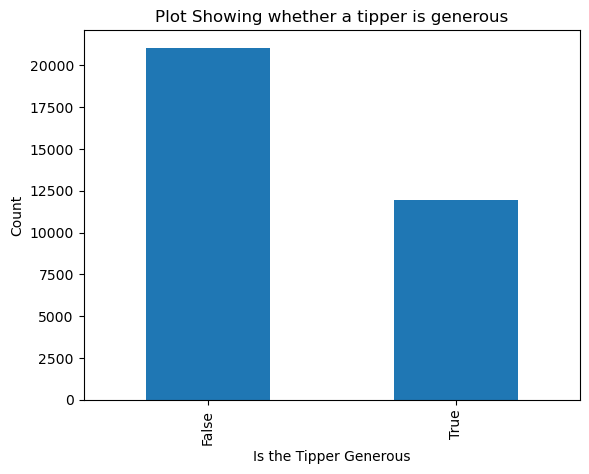

In [41]:
df.generous.value_counts().plot.bar()
plt.title('Plot Showing whether a tipper is generous')
plt.xlabel('Is the Tipper Generous')
plt.ylabel('Count');

Approximately 1/3 of the customers in this dataset were "generous" (tipped ≥ 20%). The dataset is imbalanced, but not extremely so.

To determine a metric, consider the cost of both kinds of model error:
* False positives (the model predicts a tip ≥ 20%, but the customer does not give one)
* False negatives (the model predicts a tip < 20%, but the customer gives more)

False positives are worse for cab drivers, because they would pick up a customer expecting a good tip and then not receive one, frustrating the driver.

False negatives are worse for customers, because a cab driver would likely pick up a different customer who was predicted to tip more&mdash;even when the original customer would have tipped generously.

**The stakes are relatively even. You want to help taxi drivers make more money, but you don't want this to anger customers. Your metric should weigh both precision and recall equally. Which metric is this?**

*  F1 score is the metric that places equal weight on precision and recall, and so therefore on precision and recall.

## PACE: **Construct**

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3. Modeling**

##### **Split the data**

Now you're ready to model. The only remaining step is to split the data into features/target variable and training/testing data. 

1. Define a variable `y` that isolates the target variable (`generous`).
2. Define a variable `X` that isolates the features.
3. Split the data into training and testing sets. Put 20% of the samples into the test set, stratify the data, and set the random state.

In [42]:
# Isolate target variable (y)
y = df.generous.astype(int)

# Isolate the features (X)
x = df2.drop('generous', axis=1)

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=234)

##### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take. 
 - `max_depth`  
 - `max_features`  
 - `max_samples` 
 - `min_samples_leaf`  
 - `min_samples_split`
 - `n_estimators`  

3. Define a dictionary `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf1`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of you cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)


**Note:** `refit` should be set to `'f1'`.<font/>
</details>
 


In [51]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=324)

# 2. Create a dictionary of hyperparameters to tune 
cv_params = {
    'max_depth': [8],
    'max_features': [0.1, 0.5],
    'max_samples': [5000],
    'min_samples_leaf': [1, 5],
    'min_samples_split': [6],
    'n_estimators': [500]
}

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy','precision', 'recall','f1'}

# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='f1')

Now fit the model to the training data. Note that, depending on how many options you include in your search grid and the number of cross-validation folds you select, this could take a very long time&mdash;even hours. If you use 4-fold validation and include only one possible value for each hyperparameter and grow 300 trees to full depth, it should take about 5 minutes. If you add another value for GridSearch to check for, say, `min_samples_split` (so all hyperparameters now have 1 value except for `min_samples_split`, which has 2 possibilities), it would double the time to ~10 minutes. Each additional parameter would approximately double the time. 

In [52]:
# %%time
# rf_cv.fit(x_train, y_train)

CPU times: total: 5min 8s
Wall time: 5min 12s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=324),
             param_grid={'max_depth': [8], 'max_features': [0.1, 0.5],
                         'max_samples': [5000], 'min_samples_leaf': [1, 5],
                         'min_samples_split': [6], 'n_estimators': [500]},
             refit='f1', scoring={'recall', 'precision', 'accuracy', 'f1'})

In [53]:
# save the model
import pickle
# with open('Automatidata RF.pkl', 'wb') as f:
#    pickle.dump(rf_cv, f)

In [34]:
# Define a read_pickle function
# with open('Automatidata RF.pkl') as f:
    # rf_cv = pickle.load(f)

Examine the best average score across all the validation folds. 

In [54]:
# Examine best score
rf_cv.best_score_

0.3648446245361979

Examine the best combination of hyperparameters.

In [55]:
rf_cv.best_params_

{'max_depth': 8,
 'max_features': 0.5,
 'max_samples': 5000,
 'min_samples_leaf': 5,
 'min_samples_split': 6,
 'n_estimators': 500}

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

In [56]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''
    cv_results = pd.DataFrame(model_object.cv_results_)
    
    # best_estimator_results
    ber = cv_results.iloc[cv_results['mean_test_' + metric].idxmax(), :]

    return pd.DataFrame({'model': [model_name],
                        'precision': [ber.mean_test_precision],
                        'recall': [ber.mean_test_recall],
                        'F1': [ber.mean_test_f1],
                        'accuracy': [ber.mean_test_accuracy],
                        },
                       )

Call `make_results()` on the GridSearch object.

In [93]:
results = make_results('RF CV', rf_cv, 'f1')
results

,model,precision,recall,F1,accuracy
0,RF CV,0.554518,0.272385,0.364845,0.657649


A model with such low F1, precision, and recall scores is not good enough. Optional: try to improve the scores. Generally, unless your hyperparameter search space is completely off the mark, you won't get the degree of improvement you need to approve this model. However, it's worth trying, especially to practice searching over different hyperparameters.

Use your model to predict on the test data. Assign the results to a variable called `y_pred`.

For this project, you will use several models to predict on the test data. Remember that this decision comes with a trade-off. What is the benefit of this? What is the drawback?

The benefit of using multiple models to predict on the test data is that you can compare models using data that was not used to train/tune hyperparameters. This reduces the risk of selecting a model based on how well it fit the training data.

The drawback of using the final test data to select a model is that, by using the unseen data to make a decision about which model to use, you no longer have a truly unbiased idea of how your model would be expected to perform on new data. In this case, think of final model selection as another way of "tuning" your model.

In [58]:
# Get scores on test data
y_pred = rf_cv.best_estimator_.predict(x_test)

In [94]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    cm = confusion_matrix(y_test_data, preds)
    table = pd.DataFrame({'model': [model_name], 'precision': [cm[0,0]/(cm[0,0]+cm[0,1])], 
                          'recall': [cm[0,0]/(cm[0,0]+cm[1,0])], 'accuracy': (preds==y_test_data).mean()})
    table['F1'] = 2*(table.precision * table.recall) / (table.precision + table.recall)
    return table

1. Now `get_test_scores()` function can be used to generate the scores on the test data. Lets assign the results to `rf_test_scores`.
2. Then we can call `rf_test_scores` to output the results.

###### RF test results

In [95]:
# Get scores on test data
results = pd.concat([results, get_test_scores('RF test', y_pred, y_test)]).reset_index(drop=True)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.554518,0.272385,0.364845,0.657649
1,RF test,0.883238,0.682598,0.770063,0.665252


In [87]:
# Generate array of values for confusion matrix
c_mat = confusion_matrix(y_test, y_pred)
c_mat

array([[3699,  489],
       [1720,  691]], dtype=int64)

**Question:** How do your test results compare to your validation results?

Looks better but still too low.

##### **XGBoost**

 Try to improve your scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a dictionary `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb1`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='f1'`)

In [62]:
from xgboost import XGBRFClassifier, plot_importance

In [72]:
# 1. Instantiate the XGBoost classifier
xgb = XGBRFClassifier(objective='binary:logistic', random_state=24)

# 2. Create a dictionary of hyperparameters to tune
cv_params_xgb = {
    'max_depth': [6, 12],
    'learning_rate': [0.1, 0.5],
    'min_child_weight': [2],
    'n_estimators': [500, 1000]
}

# 3. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, param_grid=cv_params_xgb, scoring=scoring, cv=4, refit='f1')

Now fit the model to the `X_train` and `y_train` data.

In [73]:
# %%time
# xgb_cv.fit(x_train, y_train)

C:\Users\pulki\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pulki\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pulki\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pulki\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision 

CPU times: total: 1h 17min 2s
Wall time: 20min 31s


GridSearchCV(cv=4,
             estimator=XGBRFClassifier(base_score=None, booster=None,
                                       callbacks=None, colsample_bylevel=None,
                                       colsample_bytree=None, device=None,
                                       early_stopping_rounds=None,
                                       enable_categorical=False,
                                       eval_metric=None, feature_types=None,
                                       gamma=None, grow_policy=None,
                                       importance_type=None,
                                       interaction_constraints=None,
                                       max_bin=None, max_cat_threshold=None,
                                       max...
                                       max_leaves=None, min_child_weight=None,
                                       missing=nan, monotone_constraints=None,
                                       multi_strategy=None, n_estima

In [102]:
# save the model
# with open('Automatidata XGB.pkl', 'wb') as f:
#     pickle.dump(xgb_cv, f)

In [34]:
# Define a read_pickle function
# with open('Automatidata XGB.pkl') as f:
#     xgb_cv = pickle.load(f)

Get the best score from this model.

In [74]:
# Examine best score
xgb_cv.best_score_

0.12980786175905515

And the best parameters.

In [75]:
# Examine best parameters
xgb_cv.best_params_

{'learning_rate': 0.5,
 'max_depth': 12,
 'min_child_weight': 2,
 'n_estimators': 1000}

XGB CV Results

Use the `make_results()` function to output all of the scores of your model. Note that it accepts three arguments. 

In [96]:
# Call 'make_results()' on the GridSearch object
results = pd.concat([results, make_results('XGB CV', xgb_cv, 'f1')]).reset_index(drop=True)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.554518,0.272385,0.364845,0.657649
1,RF test,0.883238,0.682598,0.770063,0.665252
2,XGB CV,0.617975,0.072552,0.129808,0.648594


Use your model to predict on the test data. Assign the results to a variable called `preds`.

In [77]:
# Get scores on test data
y_pred_xgb = xgb_cv.best_estimator_.predict(x_test)

###### XGB test results

1. Use the `get_test_scores()` function to generate the scores on the test data. Assign the results to `xgb_test_scores`.
2. Call `xgb_test_scores` to output the results.

In [97]:
# Get scores on test data
results = pd.concat([results, get_test_scores('XGB test', y_pred_xgb, y_test)]).reset_index(drop=True)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.554518,0.272385,0.364845,0.657649
1,RF test,0.883238,0.682598,0.770063,0.665252
2,XGB CV,0.617975,0.072552,0.129808,0.648594
3,XGB test,0.976839,0.642633,0.775251,0.640552


**Question:** Compare these scores to the random forest test scores. What do you notice? Which model would you choose?

* These scores are worse than the RF scores for training data but marginally better for test data. 
* Ideally none of these models should be selected as the metrics are low.
* But still for the sake of choosing, I would select RF CV model.

Plot a confusion matrix of the model's predictions on the test data.

In [86]:
# Generate array of values for confusion matrix
c_mat_xgb = confusion_matrix(y_test, y_pred_xgb)
c_mat_xgb

array([[4091,   97],
       [2275,  136]], dtype=int64)

**Question:** What type of errors are more common for your model?

It predicts a lot of false possitives ie the driver will have higher expectations but will lead to dissappointment a lot of the times.

##### **Feature importance**

Use the `plot_importance` function to inspect the top 10 most important features of your final model.

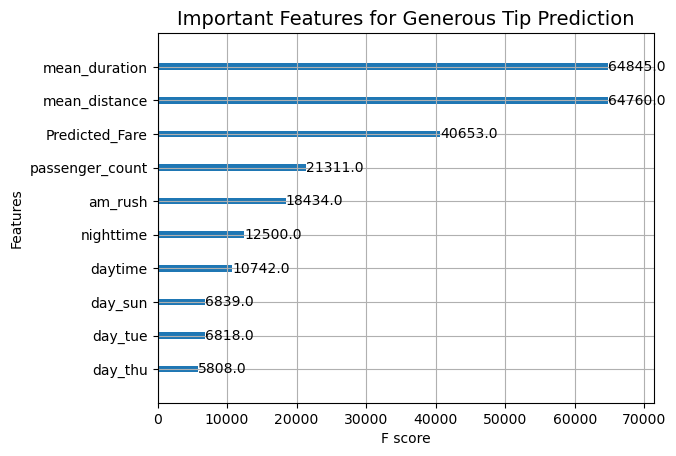

In [101]:
plot_importance(xgb_cv.best_estimator_, max_num_features=10)
plt.title("Important Features for Generous Tip Prediction", fontsize=14);

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 4. Conclusion**

In this step, use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?** \
Ans. Ideally this model should not be used as the metrics are low. It predicts a lot of false negatives ie the driver will think that a customer won't give generous tips but instead the customer would have given a generous tip. The driver might not even pick them up. But if the model says a customer will give a generous tip then its highly likely that they'll actually give a generous tip.

2. **What was your model doing? Can you explain how it was making predictions?** \
Ans. It was learning how the model output is dependent on features and after learning, it predits based on its calculated weights for each input feature provided.

3. **Are there new features that you can engineer that might improve model performance?** \
Ans. Yes features like (actual time taken / mean time for those location pairs), tax percentage in total amount, etc.

4. **What features would you want to have that would likely improve the performance of your model?** \
Ans. Features like behaviour of the driver, temperature inside the car, previous history of rider, etc.